In [8]:
from src.nn import MLP, L2_loss
from src.loss import hinge_loss
from src.data import DataLoader
from src.grad import Value

import numpy as np

from sklearn.datasets import make_moons, make_blobs

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
np.random.seed(42)

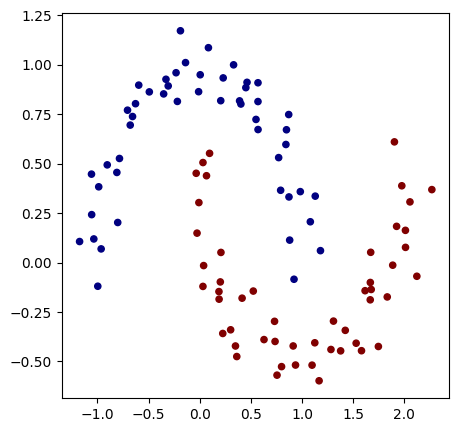

In [11]:
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [12]:
model = MLP(2, [16, 16, 1])
print(model)
print("number of parameters", len(model.parameters()))

number of parameters 337


In [13]:
def prepare_data(batch_size=None, shuffle=True):
    if batch_size is None:
        return X, y
    return DataLoader(X, y, batch_size=batch_size, shuffle=shuffle)

In [14]:
for i in range(50):
    for Xb, yb in prepare_data(batch_size=128):
        # forward
        yp = list(map(model, Xb))
        loss = hinge_loss(yb, yp)
        
        # add L1/L2
        reg_loss = L2_loss(model)
        
        total_loss = loss + reg_loss
        
        # backward 
        model.zero_grad()
        total_loss.backward()
        
        # update
        learning_rate = 1.0 - 0.9*i/100
        for p in model.parameters():
            p.data -= learning_rate * p.grad
        
    print(f"step {i} loss {loss.data}")

step 0 loss 0.8137685693501209
step 1 loss 0.36231784434721237
step 2 loss 0.33725311922500645
step 3 loss 0.30706069459859137
step 4 loss 0.2901481898180005
step 5 loss 0.2746610364149174
step 6 loss 0.2538499505703577
step 7 loss 0.24373035094580123
step 8 loss 0.2388871528957897
step 9 loss 0.23609256827024336
step 10 loss 0.23399109777209579
step 11 loss 0.23213199129008644
step 12 loss 0.2303717147429943
step 13 loss 0.22865222665821397
step 14 loss 0.22694168113804164
step 15 loss 0.2252192462834749
step 16 loss 0.22347016618920446
step 17 loss 0.2216836498710889
step 18 loss 0.21985162656582485
step 19 loss 0.21796789430782262
step 20 loss 0.21602756575970122
step 21 loss 0.21402674094933638
step 22 loss 0.21196228888475938
step 23 loss 0.20983164717468814
step 24 loss 0.20763262237937702
step 25 loss 0.20536322388130474
step 26 loss 0.20302157827581138
step 27 loss 0.20060596829647293
step 28 loss 0.1981150288484624
step 29 loss 0.19554810659218214
step 30 loss 0.19290573739642

(-1.5978882018302847, 2.1521117981697153)

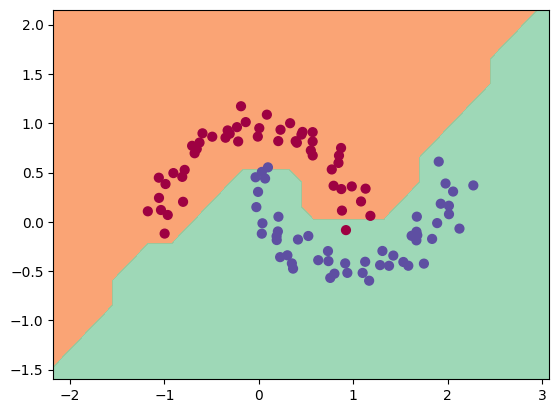

In [15]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())